<a href="https://colab.research.google.com/github/kruthikagangaraju/Machine-Learning/blob/main/MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [8]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [9]:
df["class"] = (df["class"] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


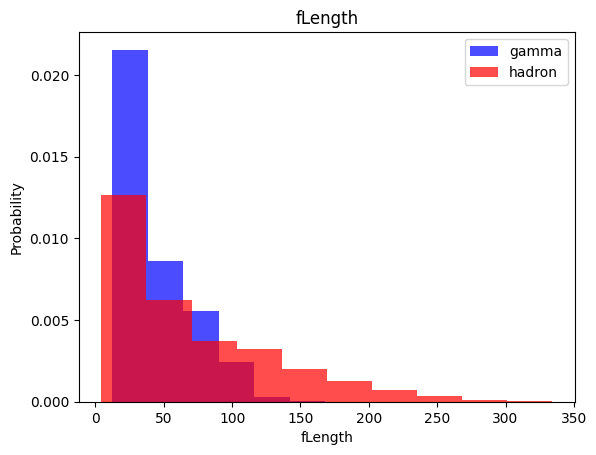

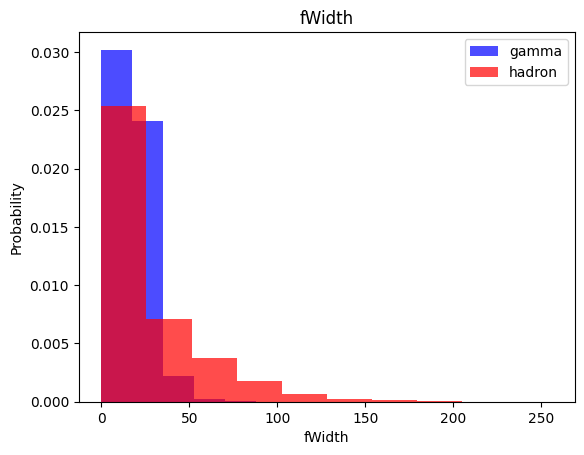

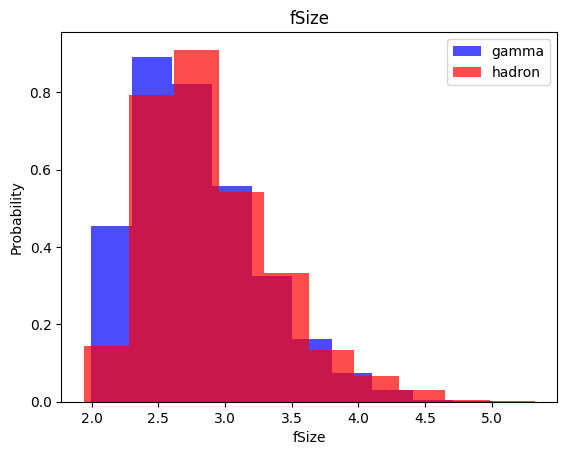

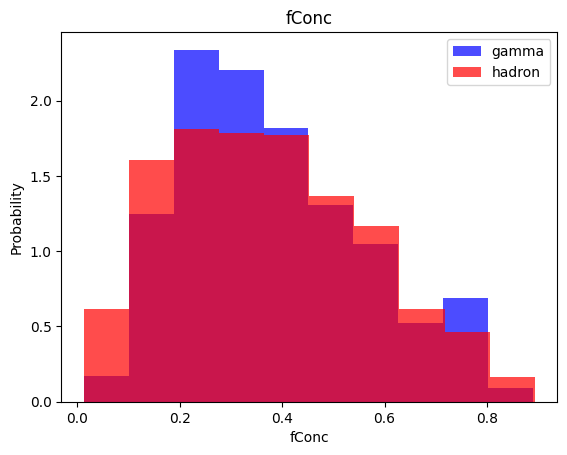

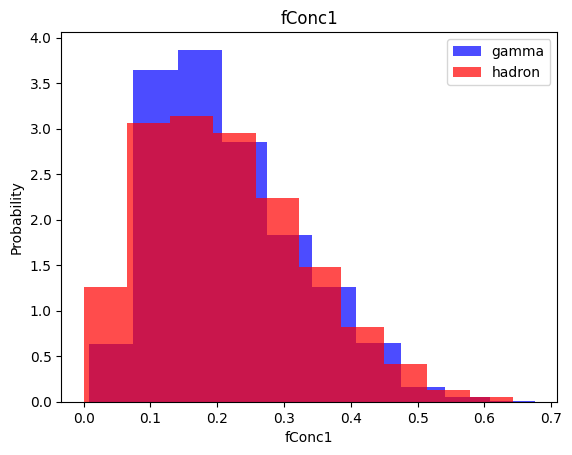

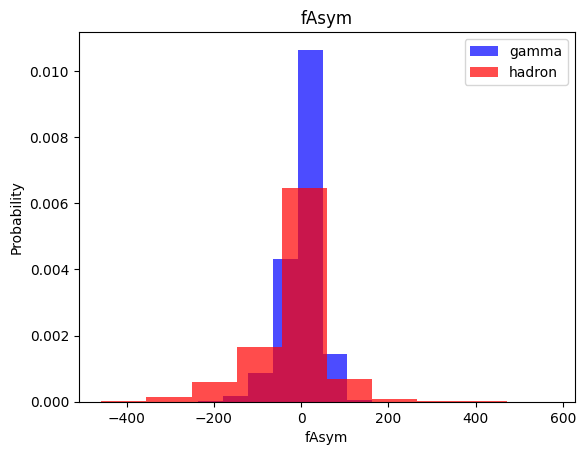

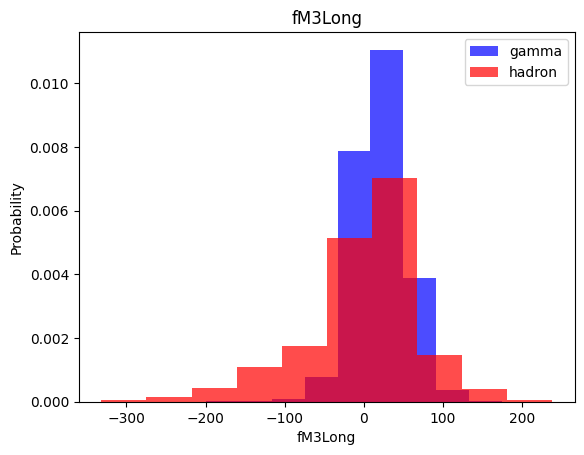

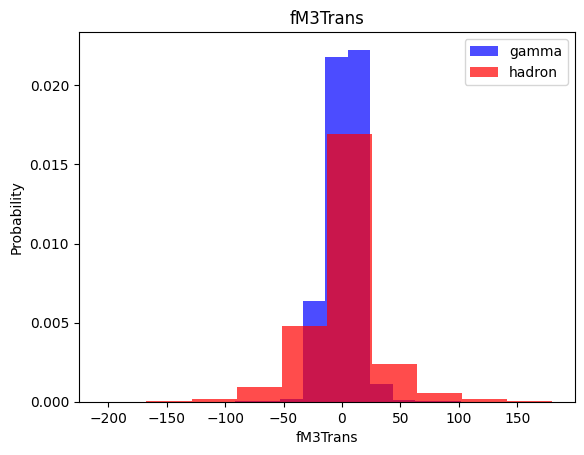

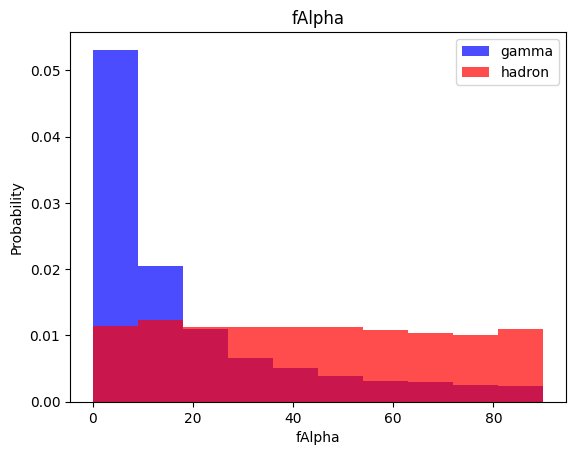

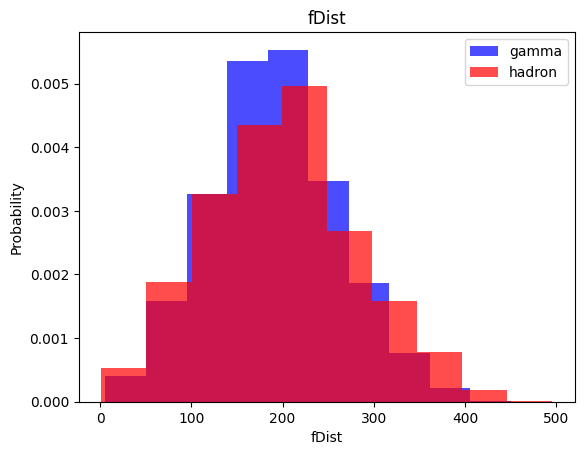

In [14]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [37]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [27]:
print(train)

       fLength   fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
13924  15.2647   5.8096  2.2321  0.5464  0.3281    9.7371   7.7963    5.4489   
7782   86.0885  36.2589  3.4839  0.2359  0.1337  -12.8931 -56.7464   -4.0291   
13266  85.8378  49.6255  3.7247  0.1331  0.0744 -106.1658 -33.8178  -37.3240   
17135  23.8526   7.2392  2.4249  0.6880  0.4605   -7.8245 -16.9932    5.2628   
18489  21.8458   5.9441  2.5471  0.5719  0.3434   -5.6226   7.9599    4.0324   
...        ...      ...     ...     ...     ...       ...      ...       ...   
13639  27.0156   7.4843  2.2945  0.6091  0.3832   12.3822   6.0053    3.7229   
18104  31.9666  14.3646  2.7792  0.4223  0.2236  -20.9010 -23.7002    9.6703   
15133  20.1149   7.1037  2.1351  0.7766  0.4066   21.5779  12.9117   -5.2355   
12054  19.9300   9.6136  2.1987  0.5886  0.3006   25.6521   5.5369    2.7116   
10767  61.6932  20.7153  3.1707  0.1903  0.1077  -14.6646  35.8305  -10.0198   

        fAlpha     fDist  class  
13924

In [35]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)
  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

In [38]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

kNN (using predefined functions)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1303
           1       0.84      0.89      0.87      2501

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes (using predefined functions)

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [48]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [50]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.49      1303
           1       0.74      0.89      0.81      2501

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



Logistic Regression (using predefined functions)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [52]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1303
           1       0.86      0.82      0.84      2501

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.80      0.79      0.79      3804



Support Vector Machines (using predefined functions)

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [55]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [56]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1303
           1       0.90      0.90      0.90      2501

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



Neural Networks

In [76]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [66]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  #ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  #ax2.legend()
  ax2.grid(True)
  plt.show()

In [80]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
  return nn_model, history

Training with 16 nodes, dropout=0.0, lr=0.01, batch_size=32


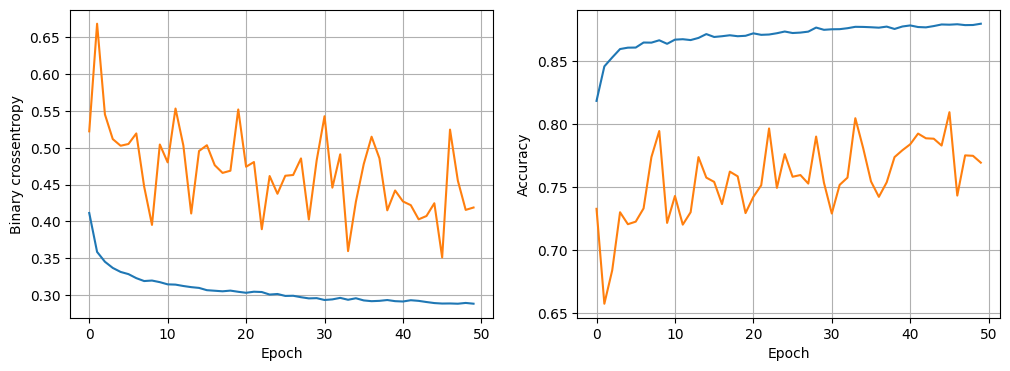

119/119 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8651
Training with 16 nodes, dropout=0.0, lr=0.01, batch_size=64


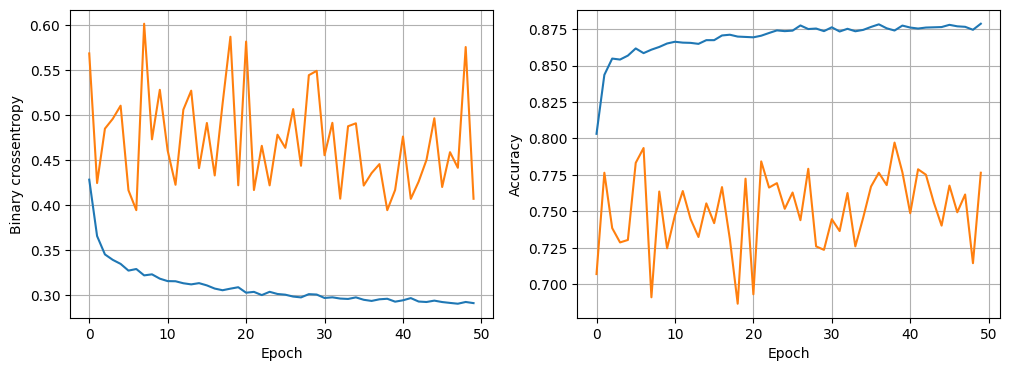

119/119 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8715
Training with 16 nodes, dropout=0.0, lr=0.005, batch_size=32


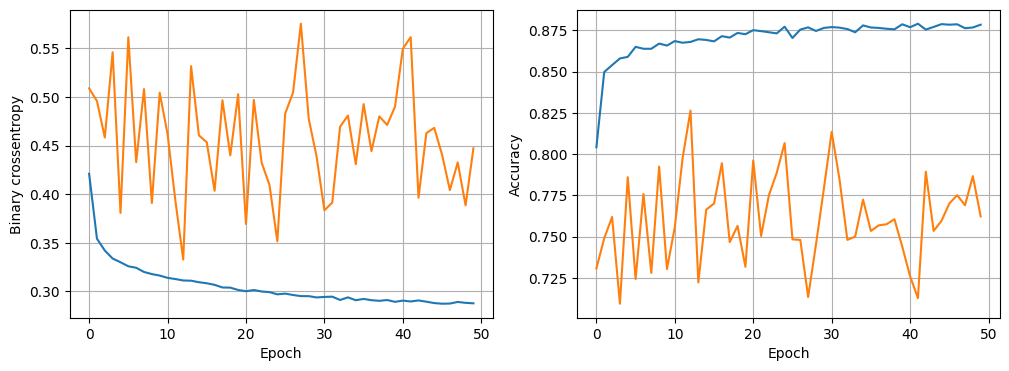

119/119 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8707
Training with 16 nodes, dropout=0.0, lr=0.005, batch_size=64


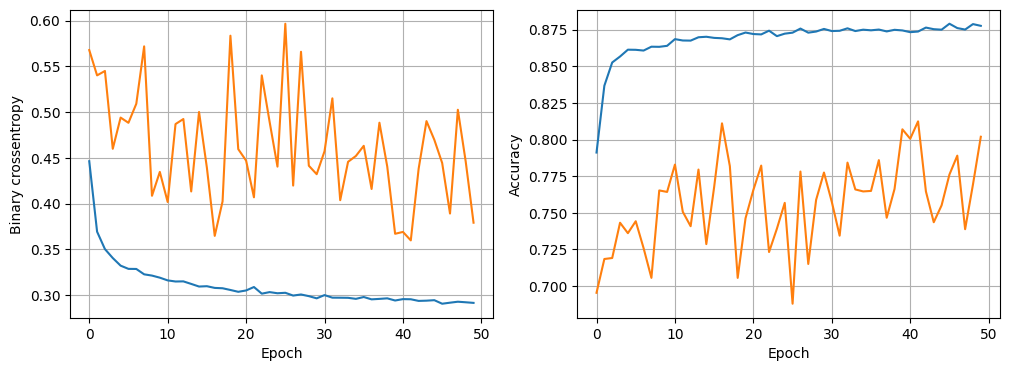

119/119 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8678
Training with 16 nodes, dropout=0.2, lr=0.01, batch_size=32


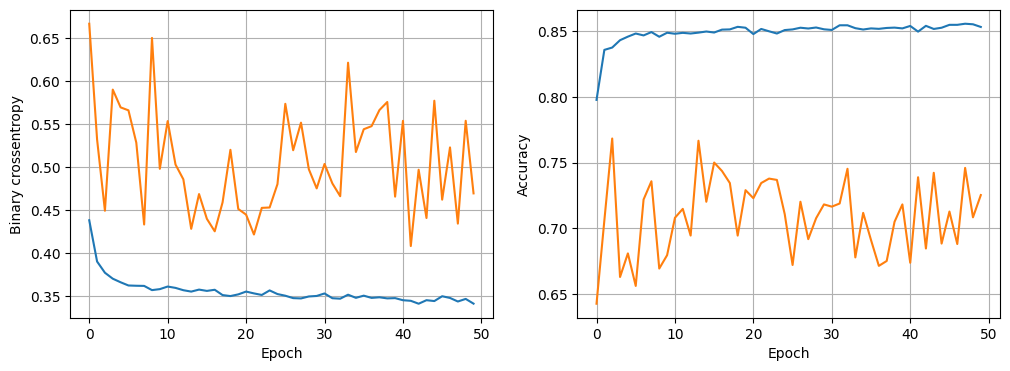

119/119 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8667
Training with 16 nodes, dropout=0.2, lr=0.01, batch_size=64


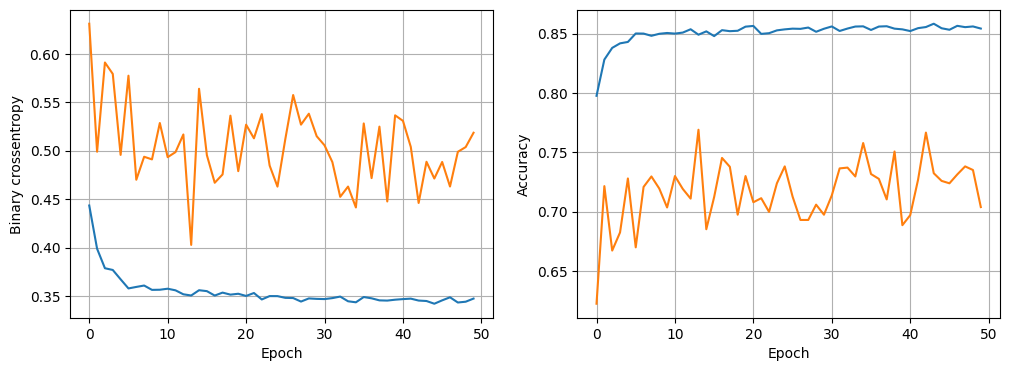

119/119 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8644
Training with 16 nodes, dropout=0.2, lr=0.005, batch_size=32


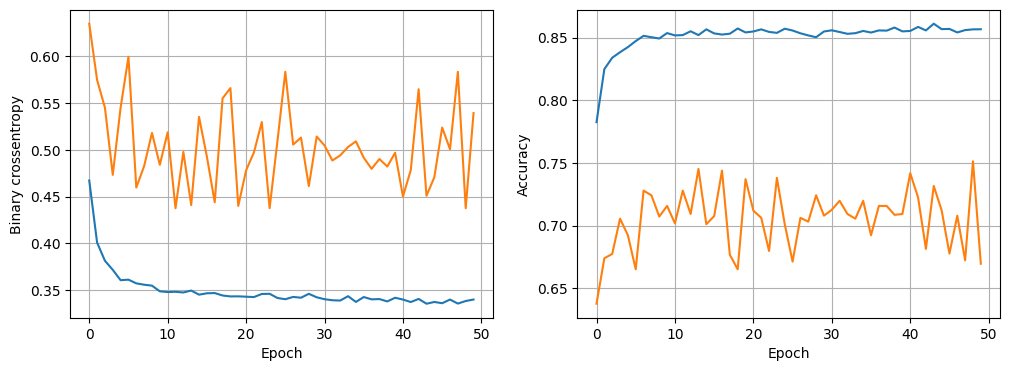

119/119 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8562
Training with 16 nodes, dropout=0.2, lr=0.005, batch_size=64


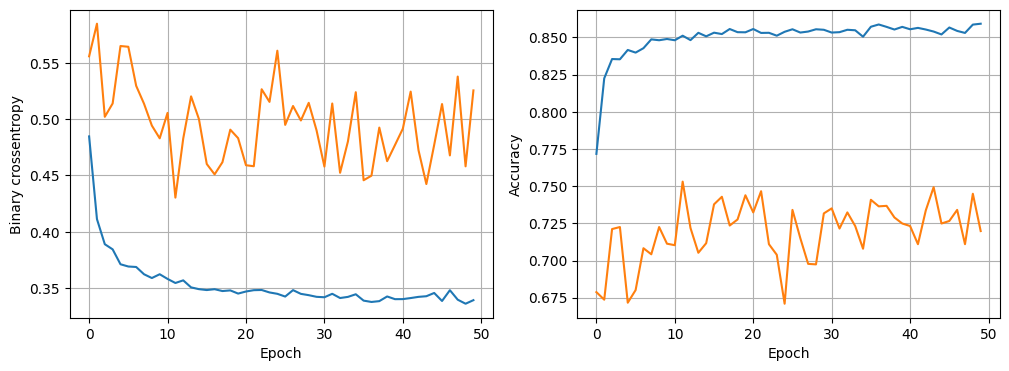

119/119 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8678
Training with 32 nodes, dropout=0.0, lr=0.01, batch_size=32


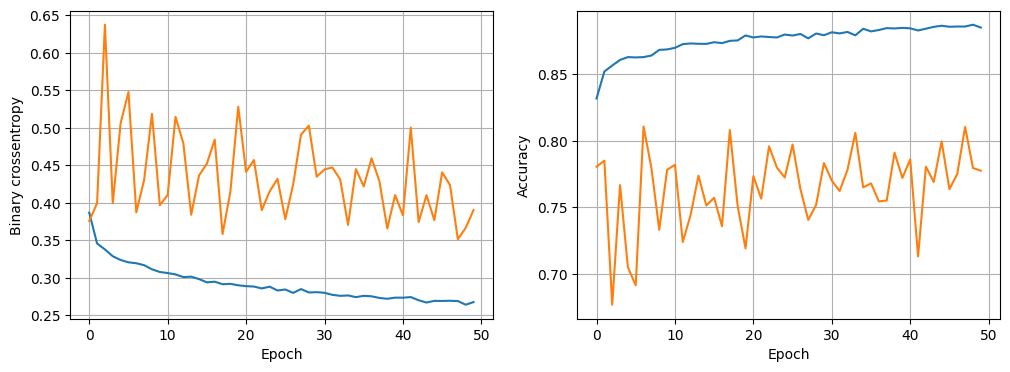

119/119 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8641
Training with 32 nodes, dropout=0.0, lr=0.01, batch_size=64


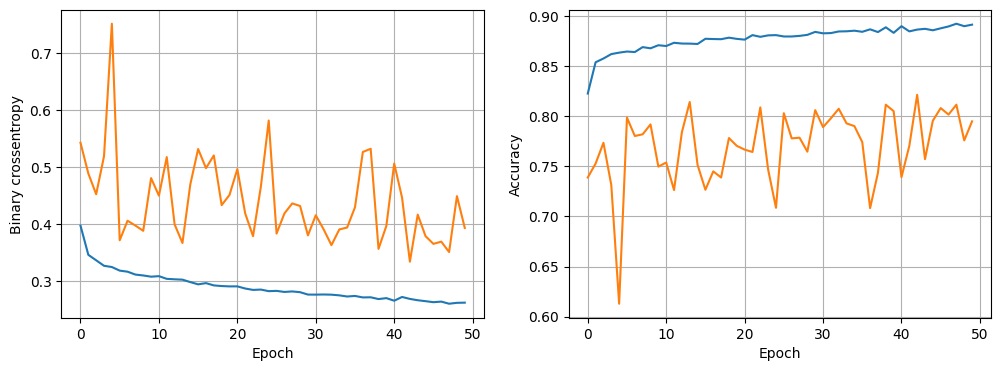

119/119 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8720
Training with 32 nodes, dropout=0.0, lr=0.005, batch_size=32


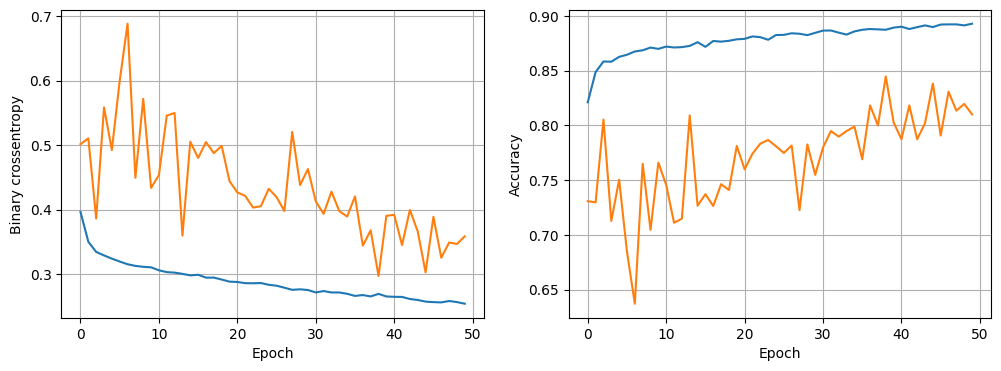

119/119 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8688
Training with 32 nodes, dropout=0.0, lr=0.005, batch_size=64


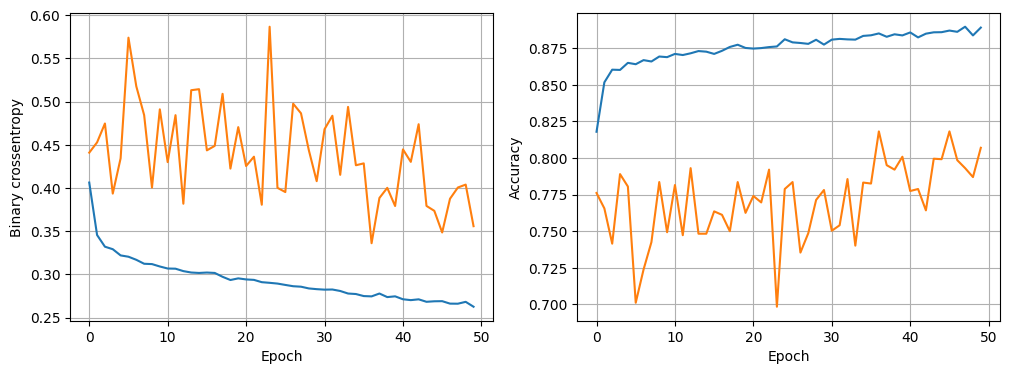

119/119 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8672
Training with 32 nodes, dropout=0.2, lr=0.01, batch_size=32


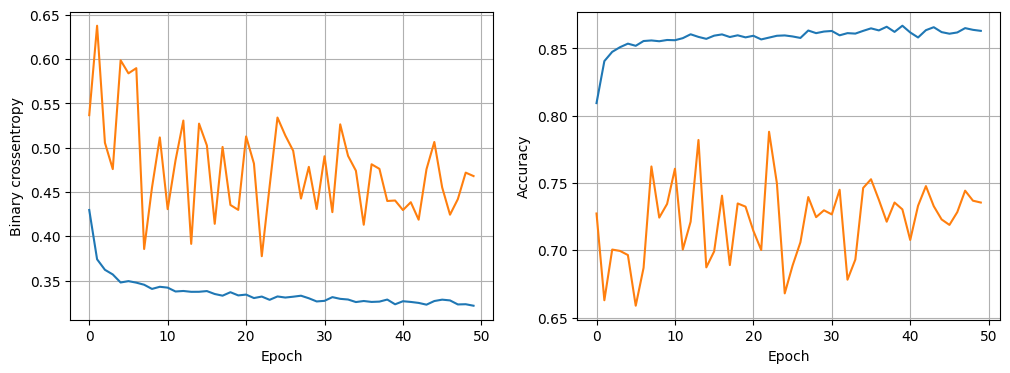

119/119 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8683
Training with 32 nodes, dropout=0.2, lr=0.01, batch_size=64


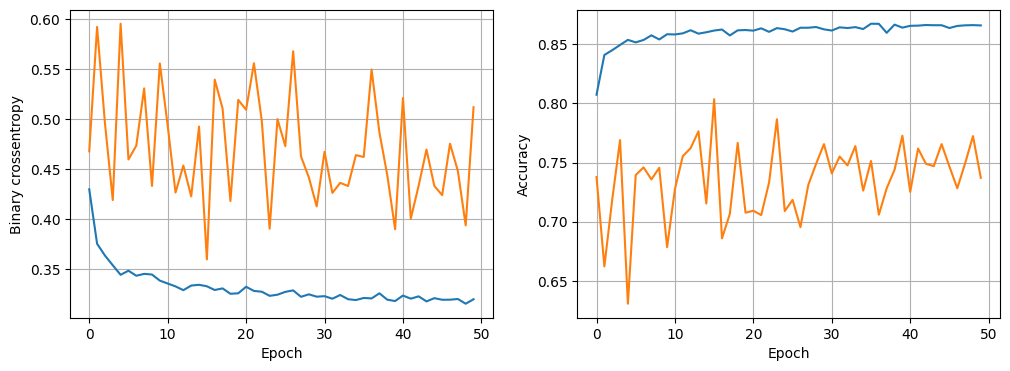

119/119 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.8686
Training with 32 nodes, dropout=0.2, lr=0.005, batch_size=32


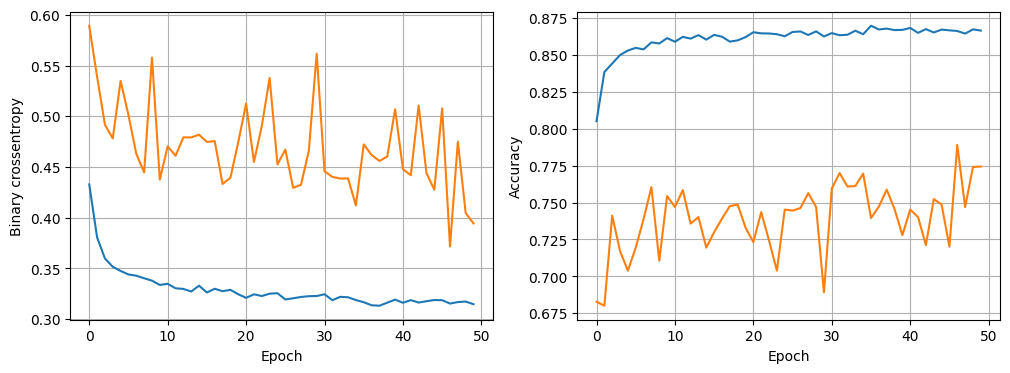

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8701
Training with 32 nodes, dropout=0.2, lr=0.005, batch_size=64


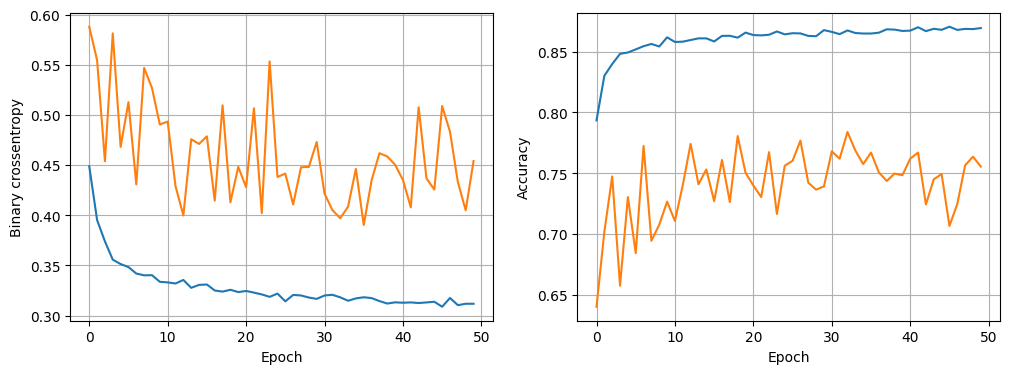

119/119 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8728


In [81]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 50
for num_nodes in [16, 32]:
  for dropout_prob in [0.0, 0.2]:
    for lr in [0.01, 0.005]:
      for batch_size in [32, 64]:
        print(f"Training with {num_nodes} nodes, dropout={dropout_prob}, lr={lr}, batch_size={batch_size}")
        nn_model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = nn_model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = nn_model
        #print(f"Validation loss: {val_loss}")

In [82]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)
print(classification_report(y_test, y_pred))

119/119 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1303
           1       0.88      0.94      0.91      2501

    accuracy                           0.88      3804
   macro avg       0.88      0.84      0.86      3804
weighted avg       0.88      0.88      0.87      3804

